# Herkenning van handgeschreven cijfers met CNN's

- Minor AAI - Hogeschool van Amsterdam
- Docenten: Frank Aldershoff & Michiel Bontenbal
- 15 september 2023

### Boek & tutorials:

**Deep Learning with Python - Francois Chollet - Chapter 8**
- https://learning-oreilly-com.rps.hva.nl/library/view/deep-learning-with/9781617296864/

**Tutorials**
- https://keras.io/examples/vision/mnist_convnet/ 
- https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/ 

## Importeer libraries

In [25]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

In [1]:
from platform import python_version
print(python_version())

3.10.9


In [3]:
import keras
keras.__version__

2023-09-15 10:31:27.115675: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.13.1'

## Verover de data

De MNIST-dataset is onderdeel van Keras en kan met het volgende commando worden ingeladen:

In [2]:
#load mnist and assing to train and test set
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [5]:
train_labels.shape

(60000,)

## Prepareer de images

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images_normalized = train_images.astype('float32')/255

In [8]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [9]:
train_images_enhanced.shape

(60000, 28, 28, 1)

In [10]:
test_images_normalized = test_images.astype('float32')/255
test_images_enhanced = test_images_normalized.reshape(10000,28,28,1)

In [11]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

**OPDRACHT**: introduceer "one-hot encoding" voor de labels (zowel train set als de test set)

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [29]:
train_labels_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
train_labels_encoded.shape

60000

## Definieer netwerk / model

**OPDRACHT**: voeg nog een convolutie laag en nog een volledig verbonden laag toe

In [15]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu', 
                  input_shape=(28,28,1)))
cnn.add(AveragePooling2D())


cnn.add(Conv2D(filters=64,
                         kernel_size=(3, 3),
                         activation='relu'))
cnn.add(AveragePooling2D())
cnn.add(Flatten())
cnn.add(Dropout(0.5))

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (Average  (None, 13, 13, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [17]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

**OPDRACHT**: meet hoe lang het trainen duurt


In [21]:
history_cnn = cnn.fit(
        train_images_enhanced,
        train_labels_encoded,
        epochs = 3,
        batch_size = 128,
        validation_data = (test_images_enhanced, test_labels_encoded)
        )

Epoch 1/3
469/469 [==============================] - 17s 35ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0261 - val_accuracy: 0.9914
Epoch 2/3
469/469 [==============================] - 17s 37ms/step - loss: 0.0170 - accuracy: 0.9941 - val_loss: 0.0234 - val_accuracy: 0.9920
Epoch 3/3
469/469 [==============================] - 18s 38ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0226 - val_accuracy: 0.9921


In [22]:
history = cnn.fit

In [23]:
history_cnn

**OPDRACHT**: meet hoe lang het testen duurt

In [24]:
%%timeit
loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)

print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9921
0.9921000003814697
313/313 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9921
0.9921000003814697
313/313 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9921
0.9921000003814697
313/313 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9921
0.9921000003814697
313/313 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9921
0.9921000003814697
313/313 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9921
0.9921000003814697
313/313 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.9921
0.9921000003814697
313/313 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.9921
0.9921000003814697
887 ms ± 84.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


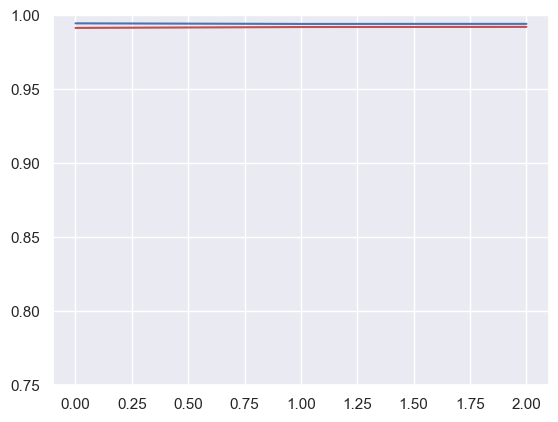

In [26]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid?
* is het netwerk onder- of over-trained?
* laat een paar fouten zien
 * wat kun je zeggen over de aard van de fouten?
* wat is sneller: het trainen of het testen?
* wat kun je nog doen om de nauwkeurigheid te verhogen?

(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)

## Evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
* welke type fouten maken de verschillende classifiers?




## To do:
- Upload het notebook naar Gitlab
- Maak aantekening in je Logboek en werk je Bloom-tabel bij. 